# Supervised Learning
## Enter the Random Forest
This notebook considers what is known as supervised learning. This kind of machine learning is structured, you have data on the outcomes you wish to predict as well as the variables you will use for prediction, you also know the variables of interest and are looking to apply a specific algorithm using these variables to predict outcomes.

Supervised refers to the fact that data on outcomes is available so that the computer 'knows' what its target is directly. We have in fact already seen an example of supervised learning when we were introduced to Sci-Kit Learn - Ordinary Least Squares regression. Generally supervised problems are split into regression problems where a numerical quantitative outcome is given and classification problems where a given data point is to be placed in one of several categories. In this tutorial we consider a classification problem but Random Forest models can be used for either type of supervised learning problem. 

In later tutorials we will move on to unsupervised learning where the nature of the predictions desired is known but there is no quantitative data on what the outcome should look like.

A decision tree is a set of nodes at each of which a choice is made, often binary True/False or Yes/No decisions but this can be extended to numerical analysis too. Running this on its own to calibrate it with data will give a single outcome at the bottom of the decision tree. This is easy to interpret since we can see the path through the decision tree and can relate decisions back to the data.

A 'Random Forest' is a collection of decision trees for this reason it is known as an 'ensemble' method since it uses the outputs of many submodels (the individual trees) to form its overall output. This means that the process can be run many many times and either the modal or mean outcome given. This provides greater accuracy since the model is no longer limited to producing a single outcome but can consider many outputs. However, this accuracy comes at the cost of interpretation since it is hard to break the model down to understand decisions in each tree and then how they contribute to the overall outcome. The idea is that one decision tree may not be accurate, but an entire forest of independent trees will provide higher accuracy because noise is canceled out and signal is strengthened.

In building a Random Forest model samples of the data are taken to construct each decision tree. The number of trees is designer choice. A greater number of trees allows finer precision in the output but requires more data since the data is shared between all of the trees.  At every node of each tree, a random sample of features is used. This sample-taking allows the forest of trees to identify data features that are truly important, not arbitrary.

In Summary of Random Forest Models: 
>#### Pros
>* Highly Accurate
>* Fast to Train
>* Able to Manage Many Input Variables (Removes the Need to Choose a Subset of Data for Training/Prediction)
>* Able to Work with Numeric and Catgeorical Data
>* Able to Perform Regression as well as Categorisation Tasks

>#### Cons
>* Hard to Interpret the Calibration
>* Prone to Overfitting Noisy Data
>* Cannot deal with Features or Characteristics not Present in the Training Data

As always lets begin by importing the Python packages we know and love to get us started. We also import various elements of Sci-Kit Learn including the Random Forest classifier model and the utility that splits our dataset into testing and training data that we saw in our introduction to Sci-Kit Learn.

Doumentation for Sci-Kit Learn's Random Forest classifier is available <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">here</a>.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

The data used in this example was originally from <a href="http://archive.ics.uci.edu/ml/index.php">UC Irvine's machine learning data repository</a>. However, it is no longer available from there so we will be using a local copy. Please change the path to reflect where you have stored the data.

It is data on student alcohol consumption from Portugal with variables denoting the amount of alcohol consumed alongside the day of the week of consumption and general demographic information on the survey participants.

It's a csv file but it isn't. That's to say its a csv file with semicolons in place of commas (so an ssv file?). Pandas can handle this so let's use that to read in the file. And take a peek at the data.

## Data

In [2]:
alcohol_data = pd.read_csv('C:/Users/DaviesI/Documents/Data Science Workshop/Data/student-alcohol-consumption.csv', sep=';')
alcohol_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
alcohol_data.shape

(649, 33)

In [4]:
alcohol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

We will now build a model to estimate alcohol consumption using the other variables in our dataset. But first...

Data Cleansing! What we data scientists love (have) to do.

For the data such as Fjob and Mjob we can't use the data in its current form since it is text and we want to work with categories. Let's set up category mappings to values for such variables so that we can use it to grow our random forest. We also either need to drop or categorise the numerical variables since our decision trees will only make category choices.

Given the information on the data types and the first few rows of the dataset seen above let's list out the numerical and nominal variables.

In [5]:
numeric_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Now we can separate this data out into its own dataframe.

In [6]:
rf_data = alcohol_data[numeric_vars]

Now we may pandas's label encoder to convert these variables into categorical ones.

Label encoder converts string values to 0, 1, ... in alphabetical order thereby rendering text categories numeric.

In [59]:
for column in alcohol_data.columns:
    if column not in numeric_vars:
        label_encoder = preprocessing.LabelEncoder()
        rf_data.ix[:, column] = label_encoder.fit_transform(alcohol_data.ix[:, column])
        rf_data.ix[:,column] = rf_data.ix[:, column].astype('category')

We can look back to the original dataset to see the string value associated to the numerical categories that we now have.

In [8]:
for i in range(5):
    print(i, " : ", sorted(alcohol_data['Fjob'].unique())[i])

0  :  at_home
1  :  health
2  :  other
3  :  services
4  :  teacher


Before we start modelling let's look at the amount students are drinking during the week and at weekends to see how this data looks.

In [9]:
alcohol_data['Dalc'].value_counts()

1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

In [10]:
alcohol_data['Walc'].value_counts()

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

Modelling with 5 levels of drinking intensity may be difficult. To make things easier let's map 1 and 2 to 0 for 'light drinkers' and 3 through 5 to 1 for 'heavy drinkers' a binary split that keeps the weekend/weekday split and will simplify analysis and modelling. These mapped values will be stored in new variables in our dataframe 'Dalc_mapped' and 'Walc_mapped' for weekday and weekend drinkers accordingly.

In [11]:
alc_mapping = {1: 0, 2: 0, 3: 1, 4: 1, 5:1}

In [12]:
rf_data['Dalc_mapped'] = rf_data['Dalc'].map(alc_mapping)
rf_data['Walc_mapped'] = rf_data['Walc'].map(alc_mapping)

In [13]:
rf_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc_mapped,Walc_mapped
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,0,1,1,0,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,1,1,0,0,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,0,1,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,1,1,1,1,0,0
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,0,1,1,0,0,0,0


## The Model
In this case as is the case in most supervised learning problems the modelling consists of three steps: split the data for training and testing (usually using 60% - 80% of the data for training and saving the remainder for testing), then as one may expect train the model and finally test, interperet and apply the model.

Let's start by preparing and splitting our data and preparing the data so that we may predict the weekend drinking nature of the studnet in question using only (what we determine to be relevant) data.

In [14]:
features = rf_data.columns
features = features.drop(['G1', 'G2', 'Mjob', 'Fjob', 'Dalc', 'Walc', 'Dalc_mapped', 'Walc_mapped'])
target = 'Walc_mapped'

In [15]:
predictor_variables = rf_data[features]
target_data = rf_data[target]

In [16]:
predictors_train, predictors_test, target_train, target_test = train_test_split(predictor_variables, target_data, test_size=0.3)

Now let's take a quick look at what we have now.

In [17]:
predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape

((454, 27), (195, 27), (454,), (195,))

We will now use the data on the 27 features we have chosen to estimate the drinking habits of Potugese studnets. You probably didn't think you'd be concerned with that today.

Time to initialise and train our model. We'll use a forest of 100 decision trees and a seed for random number generation of 1864.

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 1864)

rf_model = rf_model.fit(predictors_train, target_train)

### Using the Model
Now that we have constructed the model we can test it and apply it.

Before application let's test how good our model is using the data we saved up for testing. Sci-Kit Learn's measure of fit for random forest models is simply the percent of predictions that are correct. 

In [19]:
percent_correct = rf_model.score(predictors_test, target_test) * 100
print('The model managed to correctly predict %.1f%% of the outcomes in out test data set.' % percent_correct)

The model managed to correctly predict 71.3% of the outcomes in out test data set.


A more insightful yet complex notion of how well our model fits the data can be found using what's known as a 'confusion matrix'. This is a tool for evaluating the effectiveness of classification models. The rows of the confusion matrix relate to the predicted outcomes and the columns are the actual outcomes. Therefore the matrix represents correct classifications, false positives (and how they are wrong (i.e. What the correct classification would have been)) and false negatives (and how they are wrong). They are known as confusion matrices because they clarify where the model is 'confusing' one category for another in prediction.

A clear explanation (with pictures) is available at <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">Data School</a>.

To do this analysis we need predicted values so that we can then compare them to the true values. Let's first get some predictions and then build our confusion matrix.

In [22]:
predictions = rf_model.predict(predictors_test)

Sci-Kit Learn has a confusion matrix utility we can import. Let's use that and also make a plot so that we can visualise where our model goes wrong. We'll also import `itertools` which helps with permutations and combination calculations we can use to aid our plotting.

In [24]:
from sklearn.metrics import confusion_matrix as cm
import itertools

In [26]:
confusion_matrix = cm(target_test, predictions)

We can now write a function to make an intuitive plot of this result.

In [38]:
def plot_confusion_matrix(confusion_matrix, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Use imshow since we are building a picture rather than a traditional chart
    # 'nearest' interpolation is needed to get the sharp edges of the 4 cells rather than a steady gradient 
    # cmap is a color map used to fill in the chart
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # Add a colorbar scale
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # setting a threshold beyond which white labels will be used due to the dark background
    thresh = confusion_matrix.max() / 2.
    # Going through each cell to add the count label
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, confusion_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

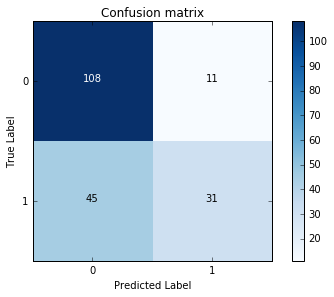

In [39]:
plot_confusion_matrix(confusion_matrix, classes=target_data.unique())

The confusion matrix adds a bit more detail to the percentage of correct predictions calculated in earlier analysis. It tells us that the model has a bias towards predicting light-drinking status and hence may have an issue with false negatives with fewer false positives.

We can go futher however, let us consider the factors the model has deemed important in prediction.

**N.B.** - At the start it was mentioned that Random Forest models are considered "black box" models because they're hard to interpret. A model only using a single decision tree instead of an entire forest of them would allow examination so thet we may see see the exact criteria used to produce a prediction for any input. Here we get a notion but cannot trace a decision path.

In [58]:
importance_vector = pd.DataFrame({'Feature': predictor_variables.columns, 'Importance': rf_model.feature_importances_})\
                    .sort_values(by = 'Importance', ascending = False)
importance_vector.set_index('Feature')

,Importance
Feature,
goout,0.114653
G3,0.088564
absences,0.067966
sex,0.059579
age,0.058156
freetime,0.052607
famrel,0.048636
health,0.048517
Medu,0.047237


By far the most influential of the variables is the boolean flag for if they go out. Clearly this reinforces that drinking is a social activity. Futher to this age and sex are also important to our prediction. We do not have an explanation of all of the variables since the UC Irvine website seems to have removed explanations. 

One thing that is important to note here is that these importance values only tell us the weights that the variables play in determining an outcome they do not tell us the direction of the relationsip. For example the fact that sex has a value of 0.06 does not tell us that men drink more than women or women more than men but simply that gender is has a certain importance to determining drinking (amongst Portuguese students).

## Extensions
There are many ways to get to understand the model better, improve the fit and prepare to learn and explore further.

Firstly one can play with the parameters of the model here, add more trees to the Random Forest, use different variables as prediction features (maybe combining and recategorising them) or use the different calibration techniques available in Sci-Kit Learn. The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Sci-Kit Learn Documentation</a> should be helpful in learning more.

Alternatively a different output can be modelled such as test scores or studytime. This may lead you to the use of a Random Forest regression rather than classification, a similar yet related problem.

Finally you can use different performance measurement metrics. For example Sci-Kit Learn's built-in Random Forest out-of-bag error (Part of the `RandomForestClassifier` object). Out-of-bag estimate is the error rate of the random forest model on the training data that is not included in the bootstrap sample of each tree. Oob error has been shown to be a good measure of error for random forest models. To do this when initialisng the Random Forest set `oob_score = True`.
<hr/>

This tutorial follows the work of Columbia Univerisity's Application Development Initative for their 2017 DevFest.
We will continue to follow this as we move forwards. The orignal tutorial can be found <a href="https://devfe.st/learn/datascience/">here</a>.

Our thanks to Lucas Schuermann, Rachel Zhang, Zach Robertson, Jillian Knoll and Ashutosh Nanda.

<h4>Questions? <a href="mailto:ian.davies@moodys.com">Contact me by email</a></h4>